In [63]:
import pandas as pd
from collections import Counter
from itertools import chain
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
df = pd.read_csv('TOLOKA_RESULTS.tsv', sep='\t')
df['OUTPUT:answer'] = df['OUTPUT:answer'].apply(lambda x: eval(x))

In [117]:
def get_connections(annotations):
    conns = []
    for ann in annotations:
        conns.append(ann['connection_type'])
    return conns

In [118]:
df['connections'] = df['OUTPUT:answer'].apply(lambda x: get_connections(x))

stats = Counter(list(chain(*df['connections'].to_list())))
stats_df = (
    pd.DataFrame
    .from_dict(stats, orient='index')
    .reset_index()
    .rename(columns={'index': 'relation', 0: 'count'})
    .sort_values(by=['count'], ascending=False)
)
stats_df

,relation,count
0,works_as,431
2,member_of,86
8,spouse,78
5,place_resides_in,74
1,workplace,66
7,ethnicity,49
11,parents,45
3,title,29
13,located_in,18
10,siblings,15


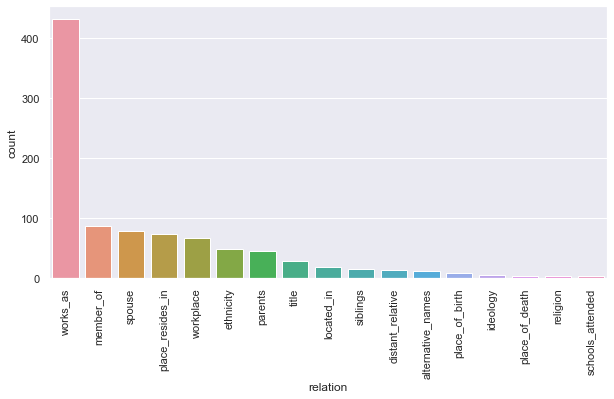

In [119]:
sns.set(style='darkgrid')
df = sns.load_dataset('iris')
sns

sns.barplot(data=stats_df, y='count', x='relation')
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(rotation=90)
plt.show()